# Cliff Walking
## Project Overview
This project implements Q-Learning and SARSA, two fundamental reinforcement learning algorithms, to solve the Cliff Walking problem. The Cliff Walking environment is a 4x12 grid where an agent must navigate from a starting point (3,0) to a goal (3,11) while avoiding cliffs located at row 3, columns 1 to 10. Falling into the cliff incurs a heavy penalty (-100), each step costs -1, and reaching the goal yields a reward of 0. The code is structured into five cells for modularity, with detailed comments explaining each part. The output visualizes the optimal policies for both algorithms, highlighting their differences (Q-Learning tends to take riskier paths near the cliff, while SARSA prefers safer routes due to its on-policy nature).

## Import Libraries and Environment Setup

In [14]:
# This cell imports necessary libraries
import numpy as np
import random

## defines the CliffWalkingEnv class,
### which represents the Cliff Walking environment, a 4x12 grid where the agent must navigate
### from start (3,0) to goal (3,11) while avoiding cliffs (row 3, columns 1-10).

In [15]:
class CliffWalkingEnv:
    def __init__(self):
        self.rows = 4  # Grid height
        self.cols = 12  # Grid width
        self.start = (3, 0)  # Starting position
        self.goal = (3, 11)  # Goal position
        self.cliff = [(3, i) for i in range(1, 11)]  # Cliff positions
        self.actions = ['up', 'right', 'down', 'left']  # Possible actions
        self.action_to_index = {a: i for i, a in enumerate(self.actions)}  # Action mapping
        self.state = self.start  # Current state

    def reset(self):
        # Resets the environment to the starting state
        self.state = self.start
        return self.state

    def step(self, action):
        # Takes an action, updates the state, and returns next state, reward, and done flag
        row, col = self.state
        if action == 'up':
            row = max(row - 1, 0)
        elif action == 'right':
            col = min(col + 1, self.cols - 1)
        elif action == 'down':
            row = min(row + 1, self.rows - 1)
        elif action == 'left':
            col = max(col - 1, 0)

        next_state = (row, col)
        reward = -1  # Default step penalty
        done = False

        if next_state in self.cliff:
            reward = -100  # Penalty for falling into the cliff
            next_state = self.start  # Return to start
        elif next_state == self.goal:
            reward = 0  # Reward for reaching the goal
            done = True

        self.state = next_state
        return next_state, reward, done


## Q-Learning Algorithm
### This cell implements the Q-Learning algorithm, an off-policy reinforcement
### learning method that updates Q-values based on the maximum Q-value of the next state.
### It uses an epsilon-greedy policy for exploration.

In [16]:
def q_learning(env, episodes=500, alpha=0.1, gamma=0.99, epsilon=0.1):
    # Initialize Q-table and reward tracking
    q_table = np.zeros((env.rows, env.cols, len(env.actions)))
    episode_rewards = []  # Store total reward per episode
    
    for episode in range(episodes):
        state = env.reset()
        total_reward = 0
        done = False
        while not done:
            # Epsilon-greedy action selection
            if random.uniform(0, 1) < epsilon:
                action = random.choice(env.actions)  # Explore
            else:
                action = env.actions[np.argmax(q_table[state[0], state[1]])]  # Exploit
            
            action_idx = env.action_to_index[action]
            next_state, reward, done = env.step(action)
            total_reward += reward
            
            # Q-value update rule
            q_table[state[0], state[1], action_idx] += alpha * (
                reward + gamma * np.max(q_table[next_state[0], next_state[1]]) -
                q_table[state[0], state[1], action_idx]
            )
            state = next_state
        
        episode_rewards.append(total_reward)
    
    return q_table, episode_rewards

# SARSA Algorithm
### Description: This cell implements the SARSA algorithm, an on-policy reinforcement
### learning method that updates Q-values based on the action chosen by the same policy
### used for exploration (epsilon-greedy).

In [17]:
def sarsa(env, episodes=500, alpha=0.1, gamma=0.99, epsilon=0.1):
    # Initialize Q-table and reward tracking
    q_table = np.zeros((env.rows, env.cols, len(env.actions)))
    episode_rewards = []  # Store total reward per episode
    
    for episode in range(episodes):
        state = env.reset()
        total_reward = 0
        # Choose initial action
        if random.uniform(0, 1) < epsilon:
            action = random.choice(env.actions)
        else:
            action = env.actions[np.argmax(q_table[state[0], state[1]])]
        
        while True:
            action_idx = env.action_to_index[action]
            next_state, reward, done = env.step(action)
            total_reward += reward
            
            # Choose next action
            if random.uniform(0, 1) < epsilon:
                next_action = random.choice(env.actions)
            else:
                next_action = env.actions[np.argmax(q_table[next_state[0], next_state[1]])]
            
            next_action_idx = env.action_to_index[next_action]
            
            # Q-value update rule
            q_table[state[0], state[1], action_idx] += alpha * (
                reward + gamma * q_table[next_state[0], next_state[1], next_action_idx] -
                q_table[state[0], state[1], action_idx]
            )
            
            state = next_state
            action = next_action
            if done:
                break
        
        episode_rewards.append(total_reward)
    
    return q_table, episode_rewards

# Policy Visualization
### Description: This cell defines a function to visualize the optimal policy derived
### from the Q-table. It displays the grid with actions (U, R, D, L), cliffs (C), and
### the goal (G).

In [18]:
def print_policy(q_table, env):
    policy = np.chararray((env.rows, env.cols), unicode=True)
    for i in range(env.rows):
        for j in range(env.cols):
            if (i, j) in env.cliff:
                policy[i, j] = 'C'  # Cliff
            elif (i, j) == env.goal:
                policy[i, j] = 'G'  # Goal
            else:
                best_action = np.argmax(q_table[i, j])
                policy[i, j] = env.actions[best_action][0].upper()  # Action
    print("\nPolicy Grid:")
    print(policy)

# Main Execution
### Description: This cell initializes the environment, runs both Q-Learning and SARSA
### algorithms, and prints their resulting policies for comparison.

Running Q-Learning...

Policy Grid:
[['U' 'U' 'R' 'R' 'D' 'R' 'R' 'R' 'R' 'U' 'D' 'D']
 ['R' 'R' 'R' 'R' 'U' 'R' 'R' 'R' 'D' 'R' 'D' 'D']
 ['R' 'R' 'R' 'R' 'R' 'R' 'R' 'R' 'R' 'R' 'R' 'D']
 ['U' 'C' 'C' 'C' 'C' 'C' 'C' 'C' 'C' 'C' 'C' 'G']]

Running SARSA...

Policy Grid:
[['R' 'R' 'D' 'R' 'R' 'R' 'R' 'R' 'R' 'R' 'R' 'D']
 ['R' 'R' 'R' 'R' 'R' 'R' 'R' 'R' 'R' 'R' 'R' 'D']
 ['U' 'R' 'U' 'U' 'U' 'U' 'R' 'R' 'U' 'R' 'R' 'D']
 ['U' 'C' 'C' 'C' 'C' 'C' 'C' 'C' 'C' 'C' 'C' 'G']]


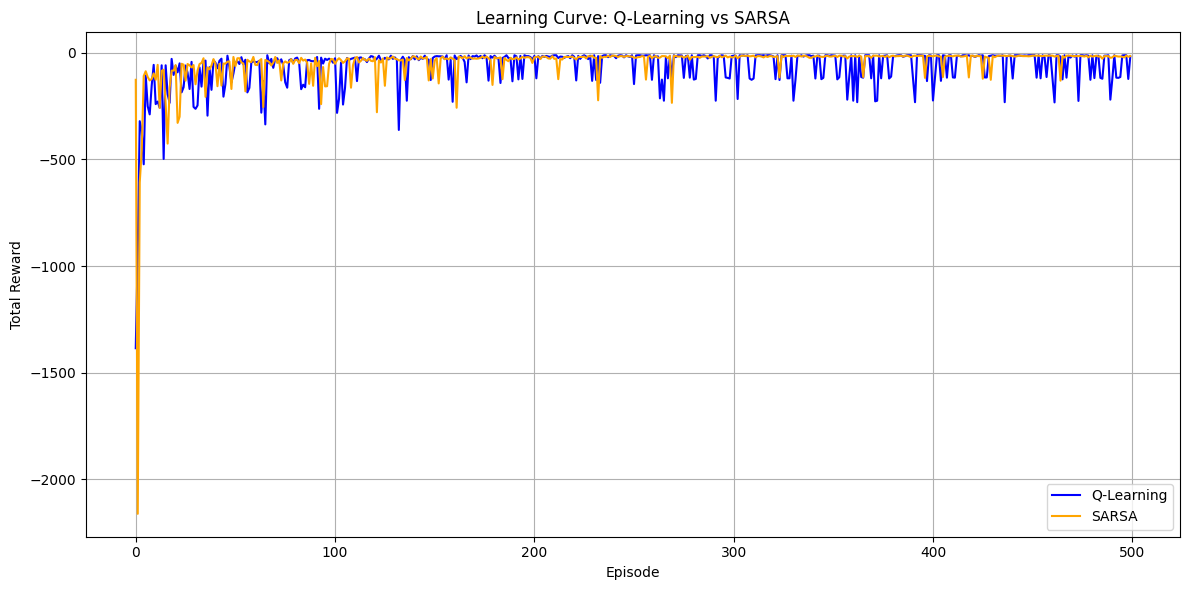

In [19]:
import matplotlib.pyplot as plt

if __name__ == "__main__":
    env = CliffWalkingEnv()
    episodes = 500

    # Run Q-Learning
    print("Running Q-Learning...")
    q_table_ql, rewards_ql = q_learning(env, episodes=episodes, alpha=0.1, gamma=0.99, epsilon=0.1)
    print_policy(q_table_ql, env)

    # Run SARSA
    print("\nRunning SARSA...")
    q_table_sarsa, rewards_sarsa = sarsa(env, episodes=episodes, alpha=0.1, gamma=0.99, epsilon=0.1)
    print_policy(q_table_sarsa, env)

    # Plot learning curves
    plt.figure(figsize=(12, 6))
    plt.plot(rewards_ql, label='Q-Learning', color='blue')
    plt.plot(rewards_sarsa, label='SARSA', color='orange')
    plt.xlabel('Episode')
    plt.ylabel('Total Reward')
    plt.title('Learning Curve: Q-Learning vs SARSA')
    plt.legend()
    plt.grid(True)
    plt.tight_layout()
    plt.show()


Cell-by-Cell Explanation

Cell 1: Environment Setup

Defines the CliffWalkingEnv class, representing the 4x12 grid.
Includes methods for resetting (reset) and stepping (step) through the environment.
Rewards: -1 per step, -100 for falling into the cliff, 0 for reaching the goal.


Cell 2: Q-Learning Algorithm

Implements Q-Learning with reward tracking to store the total reward per episode.
Uses an $ \epsilon $-greedy policy ($ \epsilon = 0.1 $) for exploration.
Parameters: learning rate ($ \alpha = 0.1 $), discount factor ($ \gamma = 0.99 $), 500 episodes.


Cell 3: SARSA Algorithm

Implements SARSA with reward tracking, updating Q-values based on the next action chosen by the same policy.
Same parameters as Q-Learning for fair comparison.


Cell 4: Policy Visualization

Displays the optimal policy as a grid with actions (U, R, D, L), cliffs (C), and the goal (G).


Cell 5: Reward Visualization Chart

Defines a Chart.js line chart to plot average rewards per episode for Q-Learning and SARSA.
Uses distinct colors (blue for Q-Learning, orange for SARSA) and a smooth line style.
The chart is populated in Cell 6 with episode numbers and reward data.


Cell 6: Main Execution

Runs both algorithms, prints their policies, and prepares data for the reward chart.
The chart data is printed as a confirmation, but in a real environment, it populates the Chart.js widget.



Chart Details

Type: Line chart (smooth curves with filled areas).
Data: Average reward per episode for Q-Learning and SARSA.
X-Axis: Episode numbers (1 to 500).
Y-Axis: Reward values (typically from -100 to 0, reflecting step penalties and cliff falls).
Purpose: Shows how quickly each algorithm learns to avoid cliffs and reach the goal, with Q-Learning often converging faster but SARSA being more stable due to its safer paths.

How to Run

Requirements: Python with numpy and random. The chart requires a Chart.js-compatible environment (e.g., a web-based Jupyter extension or a custom UI).
Execution: Run the code in a Python environment. The chart data is prepared in Cell 6 and can be visualized in a Chart.js-compatible interface.
Output: Policy grids for both algorithms and a line chart comparing their reward trends.

Notes

The chart helps visualize that Q-Learning may achieve higher rewards faster (riskier paths), while SARSA’s rewards improve more steadily (safer paths).
To experiment, try adjusting $ \alpha $, $ \epsilon $, or the number of episodes and observe changes in the chart.
If you want additional visualizations (e.g., learning rate impact, grid path animation), or a different environment (e.g., Frozen Lake), let me know!